In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

import pandas as pd
data = pd.read_csv('data_final.csv')
data

D:\Anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,...,4795,4796,4797,4798,4799,4800,4801,4802,4803,4804
0,0,0,0.193470,0.038651,0.041646,0.004156,0.055944,0.039208,0.031354,0.063743,...,0.020225,-0.001847,-0.026848,0.014621,0.035095,0.002504,-0.002073,0.003703,0.006077,1.0
1,1,1,0.148721,0.118852,0.051383,0.076629,0.036011,0.058189,0.128255,0.107680,...,0.009375,0.021383,-0.004802,0.026323,0.013047,0.000698,-0.000649,0.001024,0.002567,1.0
2,2,2,0.309485,0.107909,0.029701,0.003399,0.011241,0.000092,0.003069,0.016488,...,0.046635,-0.010222,0.022010,0.037075,0.036532,0.001741,-0.001486,0.002763,0.004103,1.0
3,3,3,0.154365,0.190421,0.133513,0.117677,0.080803,0.043746,0.096158,0.100777,...,0.027861,-0.029108,-0.019276,0.029318,0.021097,0.000107,0.000300,0.000165,0.000586,1.0
4,4,4,0.170021,0.037730,0.116279,0.007415,0.068454,0.000000,0.229443,0.076676,...,0.019440,0.001132,-0.004472,0.023459,0.019350,0.000241,-0.000305,0.002969,0.002536,1.0
5,5,5,0.352930,0.000000,0.000000,0.000000,0.000141,0.000000,0.000000,0.000000,...,0.027065,0.021605,-0.025903,0.047407,0.066617,-0.002402,0.003775,0.002907,0.007496,1.0
6,6,6,0.146011,0.144182,0.250183,0.054182,0.134853,0.022841,0.095554,0.068471,...,0.024499,-0.032535,-0.007901,0.060064,0.029054,-0.000210,0.001259,0.001516,0.002545,1.0
7,7,7,0.272058,0.200884,0.109065,0.054632,0.022537,0.014686,0.039210,0.088004,...,0.035153,0.043256,0.045215,0.043256,0.075757,0.020618,-0.003501,0.020689,0.009772,1.0
8,8,8,0.154997,0.020869,0.013694,0.003596,0.008005,0.020628,0.032824,0.155685,...,0.081989,-0.034431,0.021066,0.049734,0.063456,-0.000082,0.000128,0.001328,0.001623,1.0
9,9,9,0.098863,0.017442,0.036543,0.003172,0.054616,0.032905,0.090696,0.078384,...,0.183086,0.028946,0.005335,0.080647,0.046342,-0.011753,-0.012195,0.011965,0.015129,1.0


In [2]:
def get_label_indices(data):
    pass

In [7]:
X = np.array(data.iloc[:,2:4806])
y = data.iloc[:,-1]
y = np.array(y).reshape([-1,1])

# print(X[:,-1])
# print(y)
# print(X)
num_classes = int(np.max(y))
train_t = None
val_t = None
train_y = None
val_y = None

for i in range(1,num_classes + 1):
    indices = np.where(y == i)
    train_id = indices[0][0] + int(0.8*len(indices[0]))
    # print(indices)
    # print(train_id)
    x_train = X[indices[0][0]:train_id,:]
    x_val = X[train_id:indices[0][-1],:]
    y_train = (y[indices[0][0]:train_id,0]).reshape([-1,1])
    y_val = (y[train_id:indices[0][-1],0]).reshape([-1,1])
    
#     print(x_train.shape)
#     print(x_val.shape)
    if i == 1:
        train_t = x_train
        val_t = x_val
        train_y = y_train
        val_y = y_val
    else:
        train_t = np.vstack((train_t,x_train))
        val_t = np.vstack((val_t,x_val))
        train_y = np.vstack((train_y,y_train))
        val_y = np.vstack((val_y,y_val))

print(val_t.shape)
print(train_t.shape)
print(val_y.shape)
print(train_y.shape)

X_train,y_train,X_val,y_val = train_t,train_y,val_t,val_y

# print(num_classes)
min_in_y = np.min(y)
# print(num_classes)
# print(min_in_y)
# print(y[2069,0])
# print(y.shape)
# print(X.shape)
y_one_hot = np.zeros((X.shape[0],num_classes))
y_one_hot_train = np.zeros((X_train.shape[0],num_classes))
y_one_hot_val = np.zeros((X_val.shape[0],num_classes))

# print(y_one_hot.shape)

for i in range(y_train.shape[0]):
    y_one_hot_train[i,int(y_train[i,0])-1] = 1
for i in range(y_val.shape[0]):
    y_one_hot_val[i,int(y_val[i,0])-1] = 1

(5073, 4804)
(20403, 4804)
(5073, 1)
(20403, 1)


In [8]:
print(X_train.shape)
print(y_one_hot_train.shape)
print(y_one_hot_val.shape)
print(X_val.shape)

(20403, 4804)
(20403, 42)
(5073, 42)
(5073, 4804)


In [104]:
#Two layer NN
num_features = X.shape[1]
reg = 1e-5
epsilon = 1e-3 #Batch norm parameter
deecay = 0.999 #For exponentially moving average

hidden_1 = 500 #layers in first hidden
hidden_2 = 100 #second layer

tf.reset_default_graph()
X_tf = tf.placeholder(name='X_tf',shape=[None,num_features],dtype=tf.float32)
y_tf = tf.placeholder(name='y_tf',shape=[None,num_classes],dtype=tf.float32)
is_train = tf.placeholder(name='is_train',dtype=tf.bool)

W1 = tf.get_variable(name='W1',shape=[num_features,hidden_1],initializer=tf.contrib.layers.xavier_initializer(seed=1))
b1 = tf.get_variable(name='b1',shape=[1,hidden_1],initializer=tf.zeros_initializer())
W2 = tf.get_variable(name='W2',shape=[hidden_1,hidden_2],initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable(name='b2',shape=[1,hidden_2],initializer=tf.zeros_initializer())
W3 = tf.get_variable(name='W3',shape=[hidden_2,num_classes],initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable(name='b3',shape=[1,num_classes],initializer=tf.zeros_initializer())

In [105]:
# running_mean1 = tf.Variables()
z1 = tf.matmul(X_tf,W1) + b1
# mean1,var1 = tf.nn.moments(z1,[0])
# scale1 = tf.Variable(tf.ones([hidden_1]))
# beta1 = tf.Variable(tf.zeros([hidden_1]))
z1_BN = tf.layers.batch_normalization(z1,training=tf.equal(is_train,True))

a1 = tf.nn.relu(z1_BN)

z2 = tf.matmul(a1,W2) + b2
# mean2,var2 = tf.nn.moments(z2,[0])
# scale2 = tf.Variable(tf.ones([hidden_2]))
# beta2 = tf.Variable(tf.zeros([hidden_2]))
z2_BN = tf.layers.batch_normalization(z2,training=tf.equal(is_train,True))

a2 = tf.nn.relu(z2_BN)

z3 = tf.matmul(a2,W3) + b3
z3_BN = tf.layers.batch_normalization(z3,training=tf.equal(is_train,True))

#No batch norm applied here
a3 = tf.nn.softmax(z3_BN)

y_hat = tf.argmax(a3,axis=1)
print(y_hat.shape)
y_compare = tf.argmax(y_tf,axis=1)
print(y_compare.shape)
accuracy_ = tf.reduce_mean(tf.cast(tf.equal(y_hat,y_compare),tf.float32))

reg_loss = reg*(tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=z3,labels=y_tf)) + reg_loss

(?,)
(?,)


In [106]:
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(0.005, global_step,10, 0.5, staircase=True)

trainer = tf.train.AdamOptimizer(learning_rate)

extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_ops):
    train_step = trainer.minimize(loss)

In [108]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

num_epochs = 20
batch_size = 1024

loss_vector = []
train_acc_vector = []
val_acc_vector = []

for epoch in range(num_epochs):
    print('Epoch ' + str(epoch) + ' chal rha hai abhi')
    
    perms = np.random.permutation(X_train.shape[0])
    num_batches = (int)(X_train.shape[0]/batch_size)
    
    X_shuffle = X_train[perms,:]
    y_shuffle = y_one_hot_train[perms,:]
    
    epoch_loss = 0.0
    epoch_acc = 0.0
    epoch_val_acc = 0.0
    
    lr = 1.0
    for i in range(num_batches):
        X_batch = X_shuffle[i*batch_size:(i+1)*batch_size,:]
        y_batch = y_shuffle[i*batch_size:(i+1)*batch_size,:]
        
        _,_,l,acc,lr,it = sess.run([extra_ops,train_step,loss,accuracy_,learning_rate,is_train],feed_dict={X_tf:X_batch,y_tf:y_batch,is_train:True})
        # print('it : ' + str(it))
        epoch_loss+=l
        epoch_acc+=acc
        
    val_acc_list,it = sess.run([accuracy_,is_train],feed_dict={X_tf:X_val,y_tf:y_one_hot_val,is_train:False})    
    val_acc = val_acc_list
    # print('it : ' + str(it))
    
    print('Learning Rate chal rha hai : ' + str(lr))
    loss_vector.append(epoch_loss/(num_batches*1.0))
    train_acc_vector.append(epoch_acc/(num_batches*1.0))
    val_acc_vector.append(val_acc)
    
    if epoch%10 == 0:
        print('Epoch = '+ str(epoch))
        print('Loss = ' + str(epoch_loss/(num_batches*1.0)))
        print('Accuracy = ' + str(epoch_acc/(num_batches*1.0)))
        print('Validation Accuracy = ' + str(val_acc))

Epoch 0 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch = 0
Loss = 1.2001022790607654
Accuracy = 0.7541118421052632
Validation Accuracy = 0.67435443
Epoch 1 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 2 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 3 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 4 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 5 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 6 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 7 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 8 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 9 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 10 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch = 10
Loss = 0.01696821360995895
Accuracy = 0.9999486019736842
Validation Accuracy = 0.9842302
Epoch 11 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch 12 chal rha hai abhi
Learning Rate chal rha hai : 0.005
Epoch

In [110]:
print('Final-Loss : ' + str(loss_vector[-1]))
print('Final-Train-Accuracy : ' + str(train_acc_vector[-1]))
print('Final-Val-Accuracy : ' + str(val_acc_vector[-1]))

Final-Loss : 0.01240043400933868
Final-Train-Accuracy : 1.0
Final-Val-Accuracy : 0.98541296


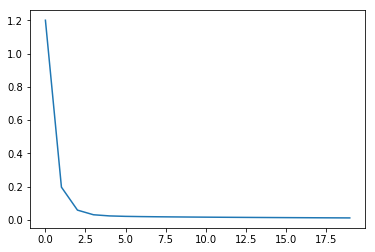

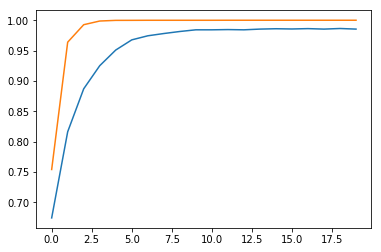

In [109]:
epochs = [i for i in range(num_epochs)]
plt.plot(epochs,loss_vector)
plt.figure()
plt.plot(epochs,val_acc_vector)
plt.plot(epochs,train_acc_vector)
plt.show()

In [111]:
saver = tf.train.Saver(tf.global_variables())
save_path = saver.save(sess, "tmp/model_bn.ckpt")

In [ ]:
'''
TODO: 
Try On Test Images
BatchNorm
Increase Accuracy On Neural Net
Faster Clutering/Alternative
---Read Papers
    - SURF Maths
Try Only Surf By Increasing Key Point Numbers
'''